<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-03 22:27:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  69.4MB/s    in 2.2s    

2025-11-03 22:27:33 (69.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [14]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


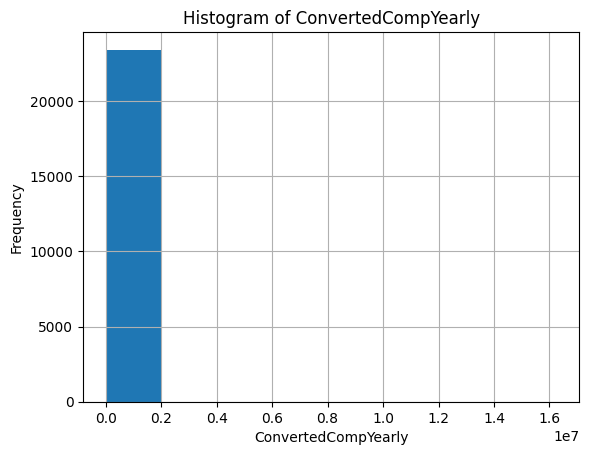

In [15]:
## Write your code here
df['ConvertedCompYearly'].hist(bins=8) # You can adjust the number of bins as needed

plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


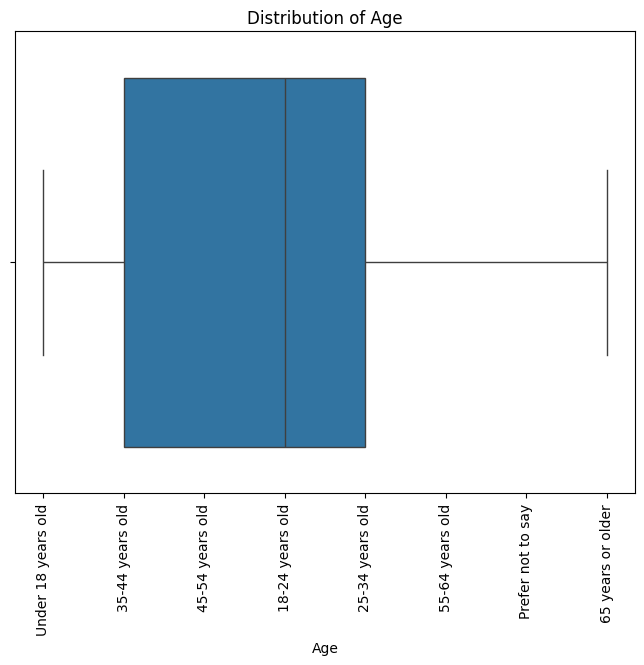

In [19]:
## Write your code here
import seaborn as sns 

# Add a title and display the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Age", data=df)
plt.title("Total Bill Distribution by Day")
plt.xticks(rotation=90, ha='center') 
plt.title("Distribution of Age")
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


/tmp/ipykernel_4083/2582723030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


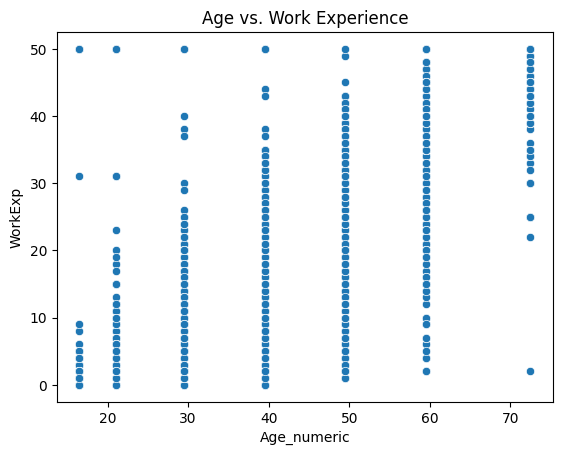

In [22]:
## Write your code here
df['Age'] = df['Age'].replace('Under 18 years old', '15-18 years old')
df['Age'] = df['Age'].replace('65 years or older', '65-80 years old')
dfage = df.loc[df.Age != 'Prefer not to say'] 
dfage.Age.unique() 

def convert_age_range(age_range):
    ar = age_range.split('y')[0]
    start, end = map(int, ar.split('-'))
    return (start + end) / 2

# Step 2: Apply it to the Age column
dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


sns.scatterplot(data=dfage, x="Age_numeric", y="WorkExp")
plt.title("Age vs. Work Experience")
plt.xlabel("Age_numeric")
plt.ylabel("WorkExp")
plt.show()

In [27]:
df.TimeSearching.unique()

array([nan, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [30]:
df['TimeSearching'] = df['TimeSearching'].replace('Less than 15 minutes a day', '0-15 minutes a day')
df['TimeSearching'] = df['TimeSearching'].replace('Over 120 minutes a day', '120-160 minutes a day')
df = df.loc[~df.TimeSearching.isna()]

def converttime(time_range):
    tr = time_range.split('m')[0]
    start, end = map(int, tr.split('-'))
    return (start + end) / 2

# Step 2: Apply it to the Age column
df['Time_numeric'] = df['TimeSearching'].map(converttime)

/tmp/ipykernel_4083/4229715292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_numeric'] = df['TimeSearching'].map(converttime)


In [35]:
df_exploded = df.assign(Fustration=df['Frustration'].str.split(';')).explode('Frustration')

duplicate_counts_fustration = df_exploded['Frustration'].value_counts() 
print(duplicate_counts_fustration)

Frustration
None of these                                                                                                                                                                                                                                              2351
Amount of technical debt                                                                                                                                                                                                                                   2048
Amount of technical debt;Reliability of tools/systems used in work                                                                                                                                                                                          827
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build                                                                                                                         

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [43]:
df.DatabaseWantToWorkWith.unique() 

array(['Elasticsearch;MongoDB;PostgreSQL;SQLite', 'MySQL',
       'Microsoft SQL Server', ...,
       'MariaDB;MongoDB;PostgreSQL;Snowflake',
       'Cosmos DB;PostgreSQL;Supabase',
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis'],
      shape=(5602,), dtype=object)

<Figure size 1200x600 with 0 Axes>

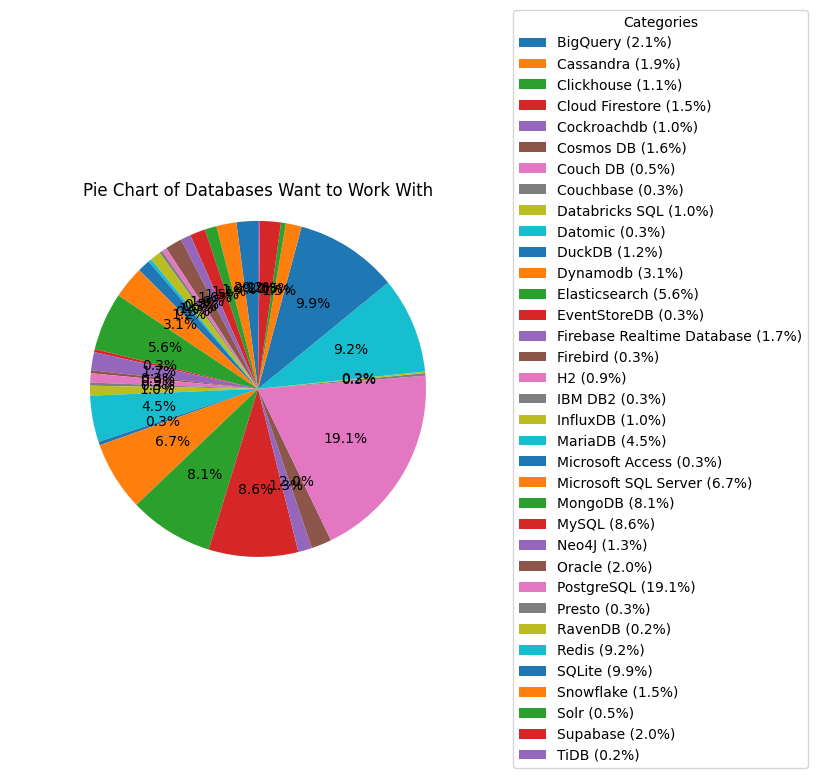

In [66]:
## Write your code here
from collections import Counter

df.dropna(subset=['DatabaseWantToWorkWith'], inplace=True)

colB = []
for val in df.DatabaseWantToWorkWith: 
    s = val  
    parts = s.split(';')
    colB.append(parts)

flattened_colB = [item for sublist in colB for item in sublist]

count_want_with = Counter(flattened_colB)

# Combine into DataFrame
databases = sorted(set(flattened_colB))
df2 = pd.DataFrame({
    'Database': databases,
    'Sizes': [count_want_with.get(lang, 0) for lang in databases]
})

# Plot piechart
plt.figure(figsize=(12, 6))
sizes = df2.Sizes
labels = list(df2.Database.unique())
total_size = sum(sizes)

percentages = [f"{size / total_size * 100:.1f}%" for size in sizes]

# 2. Create the pie chart
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=90) # autopct adds percentages on slices

# 3. Construct custom legend labels
legend_labels = [f"{label} ({percentage})" for label, percentage in zip(labels, percentages)]

# 4. Create the legend
ax.legend(patches, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie Chart of Databases Want to Work With")
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_4083/4044643921.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)


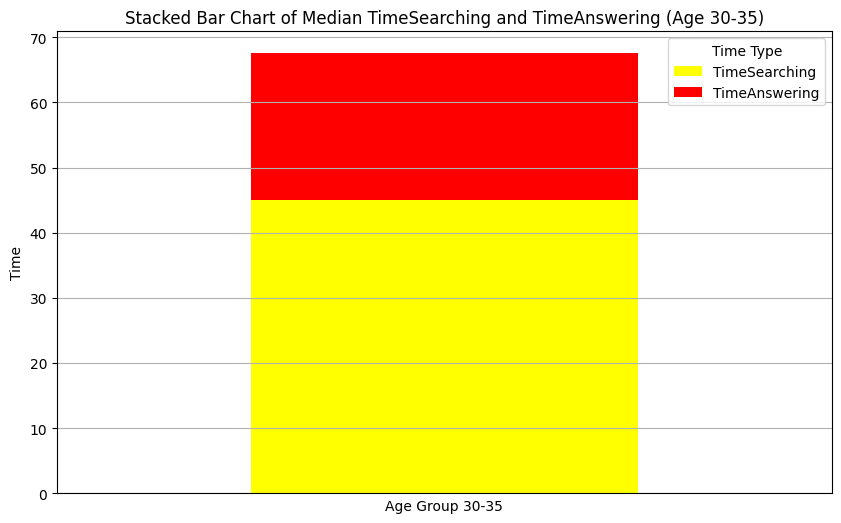

In [71]:
## Write your code here
# Replace 'Prefer not to say' with NaN
import numpy as np 
df.replace('Prefer not to say', np.nan, inplace=True)

# Mapping for Age groups to their midpoints
mapping_age_group = {
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2
}

# Map the Age column to age groups
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Map the time categories to numeric values (minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,  # midpoint of <15 minutes
    '15-30 minutes a day': 22.5,  # midpoint of 15-30 minutes
    '30-60 minutes a day': 45,  # midpoint of 30-60 minutes
    '60-120 minutes a day': 90,  # midpoint of 60-120 minutes
    'Over 120 minutes a day': 150  # assumed midpoint for >120 minutes
}

# Replace the time category columns with numeric values
df['TimeSearching'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering'] = df['TimeAnswering'].map(time_mapping)

# Drop rows where TimeSearching or TimeAnswering is NaN after mapping
df.dropna(subset=['TimeSearching', 'TimeAnswering'], inplace=True)

# Replace NaN in AgeMapped with its mean value
df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)

# Filter the data for age group 30 to 35
df_age_group = df[(df['AgeMapped'] >= 30.0) & (df['AgeMapped'] <= 35.0)]

# Calculate the median for TimeSearching and TimeAnswering
median_time_searching = df_age_group['TimeSearching'].median()
median_time_answering = df_age_group['TimeAnswering'].median()

# Prepare the data for the stacked bar chart 
data = {
    'TimeSearching': median_time_searching,
    'TimeAnswering': median_time_answering
}

# Convert data into a DataFrame for plotting
df_median = pd.DataFrame([data])

# Plot the stacked bar chart
df_median.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellow', 'red'])

# Customize the plot
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering (Age 30-35)')
plt.xlabel('Age Group 30-35')
plt.ylabel('Time')
plt.legend(title="Time Type", labels=["TimeSearching", "TimeAnswering"])
plt.xticks([])  # Remove x-ticks as it's just one bar group
plt.grid(True, axis='y')

# Show the plot
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [72]:
## Write your code here
df.Age.unique() 

array(['35-44 years old', '45-54 years old', '25-34 years old',
       '55-64 years old', '18-24 years old', '65-80 years old', nan,
       '15-18 years old'], dtype=object)

In [73]:
df.CompTotal.unique() 

array([     nan, 2040000.,  110000., ...,   62700.,  247433., 1690000.],
      shape=(2064,))

/tmp/ipykernel_4083/1710699940.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)


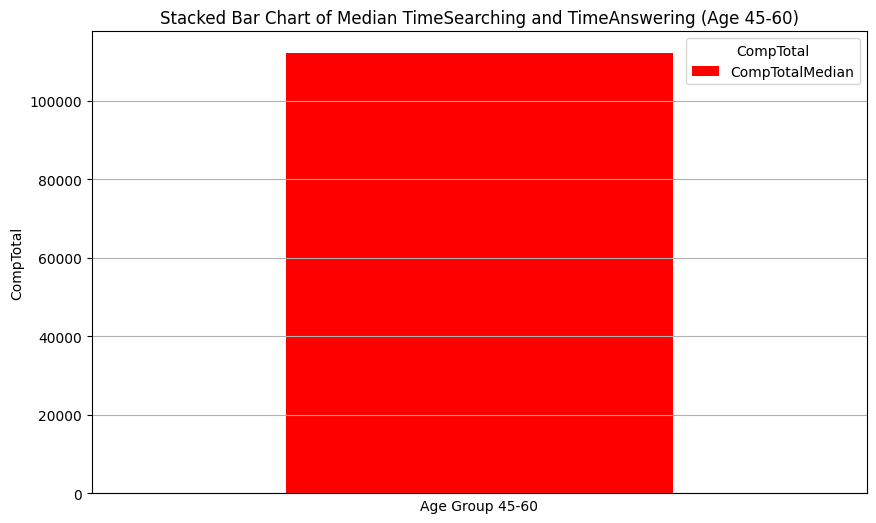

In [75]:
## Write your code here
# Replace 'Prefer not to say' with NaN
import numpy as np 
df.replace('Prefer not to say', np.nan, inplace=True)

# Mapping for Age groups to their midpoints
mapping_age_group = {
    "45-54 years old": 45,
    "55-64 years old": (55+64)/2
}

# Map the Age column to age groups
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Replace NaN in AgeMapped with its mean value
df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)

# Filter the data for age group 30 to 35
df_age_group = df[(df['AgeMapped'] >= 45.0) & (df['AgeMapped'] <= 60.0)]

# Calculate the median for TimeSearching and TimeAnswering
median_comp = df_age_group['CompTotal'].median()

# Prepare the data for the stacked bar chart 
data = {
    'CompTotalMedian': median_comp,
}

# Convert data into a DataFrame for plotting
df_median = pd.DataFrame([data])

# Plot the stacked bar chart
df_median.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red'])

# Customize the plot
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering (Age 45-60)')
plt.xlabel('Age Group 45-60')
plt.ylabel('CompTotal')
plt.legend(title="CompTotal")
plt.xticks([])  # Remove x-ticks as it's just one bar group
plt.grid(True, axis='y')

# Show the plot
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


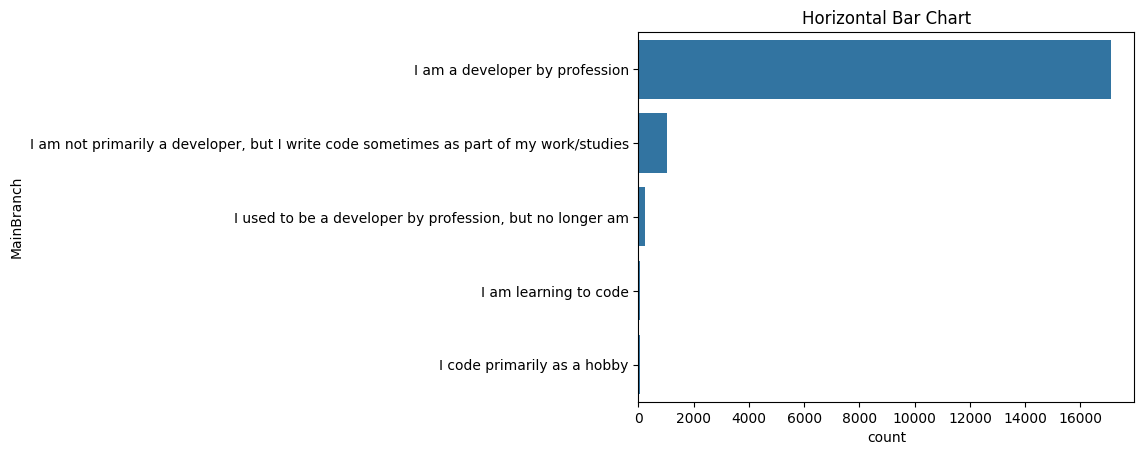

In [86]:
## Write your code here
# Create a horizontal bar chart by assigning 'Category' to y and 'Value' to x
dfplot = df.MainBranch.value_counts().reset_index()
sns.barplot(x='count', y='MainBranch', data=dfplot)
plt.title('Horizontal Bar Chart')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
